In [20]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('/content/Tech_Layoffs_of_2022.csv', index_col = [0])


In [3]:
print("The number of rows and columns are:")
print(df.shape)

The number of rows and columns are:
(41, 5)


In [4]:
print(df.head())

     Company  Founded  Layoff     Month  Year
0  Microsoft     1975    1000   October  2022
1    Twitter     2006    3700  November  2022
2       Meta     2004   11000  November  2022
3    Netflix     1997     300      June  2022
4      Udaan     2016     350  November  2022


In [7]:
# Viewing  10 random observations in the dataset

df.sample(10) 

,Company,Founded,Layoff,Month,Year
4,Udaan,2016,350,November,2022
12,Vedantu,2011,100,July,2022
37,Better.Com,2016,900,December,2021
33,Cineplex,1999,5000,January,2022
3,Netflix,1997,300,June,2022
24,Nestlé,1866,104,March,2022
30,Coinbase,2012,1100,June,2022
28,Klarna,2005,700,May,2022
32,Tesla,2003,200,June,2022
14,Meesho,2015,300,August,2022




*   This sample shows different company names
*   Observation on Company Founding Year, Number of Layoffs and the month and year it happened



In [8]:
# Checking for all the different datatypes in the dataset

df.dtypes

Company    object
Founded     int64
Layoff      int64
Month      object
Year        int64
dtype: object



*   Among the 5 columns Company and Month are of object type


*   And the rest all are integer data type





In [9]:
# Checking for any missing values

df.isnull()

,Company,Founded,Layoff,Month,Year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


This confirms that there are no missing values in the dataset.

In [12]:

# Viewing the overall information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  41 non-null     object
 1   Founded  41 non-null     int64 
 2   Layoff   41 non-null     int64 
 3   Month    41 non-null     object
 4   Year     41 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.9+ KB


In [14]:
# Checking the statistical summary of the numerical variables in the dataset 
# 'T' is to transpose the output

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,41.0,1985.634146,82.654327,1516.0,1999.0,2011.0,2016.0,2019.0
Layoff,41.0,3599.146341,15550.382445,40.0,200.0,500.0,1500.0,100000.0
Year,41.0,2021.975610,0.156174,2021.0,2022.0,2022.0,2022.0,2022.0




*   The companies range from being established in 1516 to 2019
*   Layoff count is right skewed as the mean is greater than the median


*   The average number of people being laid off is around 3600
*   The difference between the third quartile and max value of layoff count indicates outliers (the sudden recessions etc)





In [15]:
# Checking the summary of non-numerical values in the dataset

df.describe(exclude = 'number').T

,count,unique,top,freq
Company,41,38,Better.Com,4
Month,41,12,July,5




*   Better.Com has had many layoffs( frequently timed)
*   July was the worst month with most number of layoffs



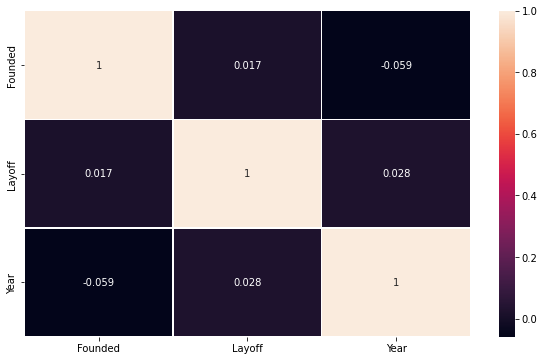

In [21]:
data_correlation = df.corr()
plt.figure(figsize=(10,6))

sns.heatmap(data_correlation, annot=True, linewidths = 0.2, linecolor = 'white')

Let's find out where the most number of layoffs have happened

In [22]:
fig = px.pie(df.sort_values('Layoff', ascending = False).head(10), 
             values='Layoff', 
             names='Company', 
             title='Top 10 Layoff-ers',
             color_discrete_sequence=px.colors.sequential.Viridis)
fig.show()

In [23]:
#Top 10 Layoffs excluding Amazon


df = df.drop(df[df['Company'] == 'Amazon'].index)

fig = px.pie(df.sort_values('Layoff', ascending = False).head(10), 
             values='Layoff', 
             names='Company', 
             title='Top 10 Layoff-ers',
             color_discrete_sequence=px.colors.sequential.Viridis)
fig.show()

When exactly in 2022 did these happen?

In [24]:
fig = px.sunburst(df.sort_values('Layoff', ascending = False).head(10), 
             values='Layoff', path = ['Month', 'Year'],
             title='Sunburst Plot',
             color_discrete_sequence=px.colors.sequential.Viridis)
fig.show()